In [1]:
import sys
sys.path.append("../")
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch
from lora_diffusion import tune_lora_scale, patch_pipe
import open_clip
from PIL import Image

model_id = "/DATA/DATANAS1/zhangyip/models/stable-diffusion-2-1-base"

with torch.no_grad():
    pipe = StableDiffusionPipeline.from_pretrained(model_id).to("cuda")
    img_model, _, preprocess = open_clip.create_model_and_transforms('ViT-H-14', pretrained='laion2b_s32b_b79k')
    img_model = img_model.to("cuda")

/home/chenhong/.conda/envs/diffusion/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [2]:
patch_pipe(
    pipe,
    "./output_dreambooth/disenft_0.1origin_vase/checkpoint/lora_weight_e533_s3200.pt",
    patch_text=False,
    patch_ti=False,
    patch_unet=True,
)
ref_image = preprocess(Image.open("/DATA/DATANAS1/chenhong/diffusion_research/dreambooth_data/vase/03.jpg")).unsqueeze(0).to("cuda")

LoRA : Patching Unet


  0%|          | 0/50 [00:00<?, ?it/s]

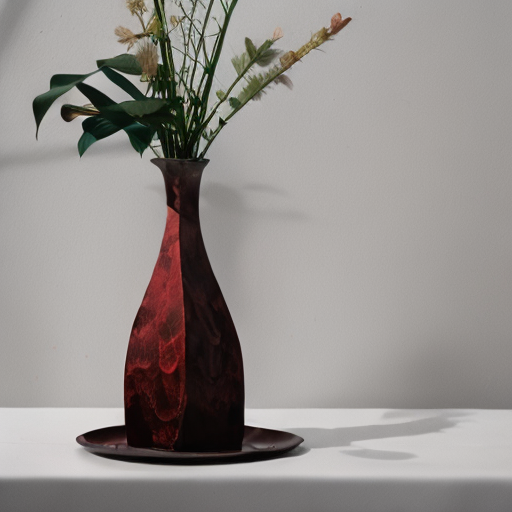

In [3]:
from visualization import joint_visualization
prompt = "a <s1>|<s2> vase"
tune_lora_scale(pipe.unet, 1.0)
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.0)[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

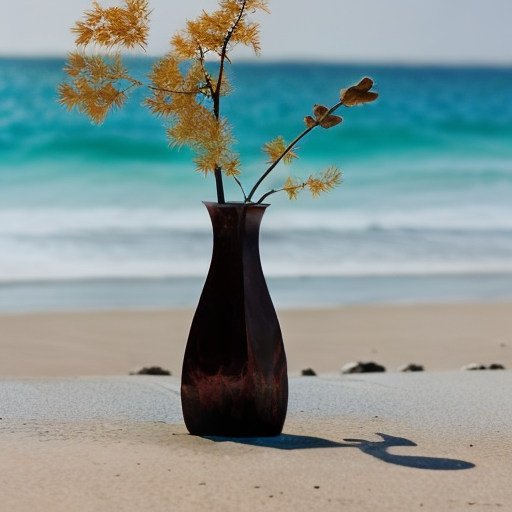

In [4]:
prompt = "a <s1>|<s2> vase on the beach"
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.0)[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

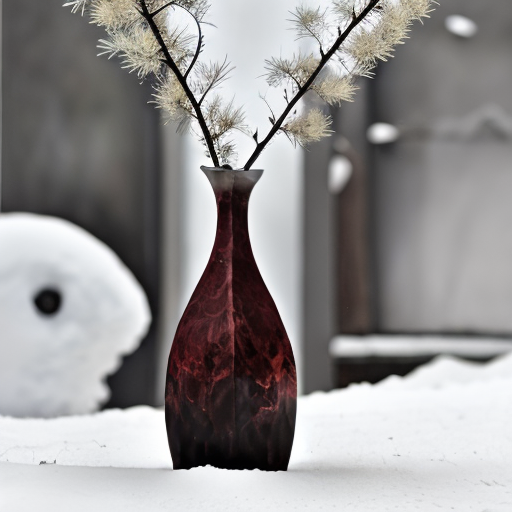

In [10]:
prompt = "a <s1>|<s2> vase in the snow"
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.05)[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

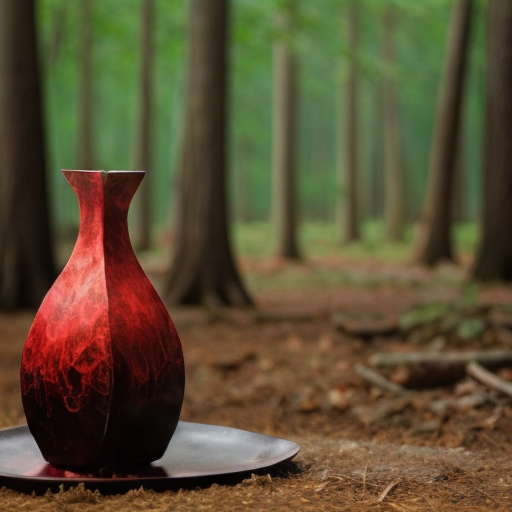

In [9]:
prompt = "a <s1>|<s2> vase in the forest"
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.1)[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

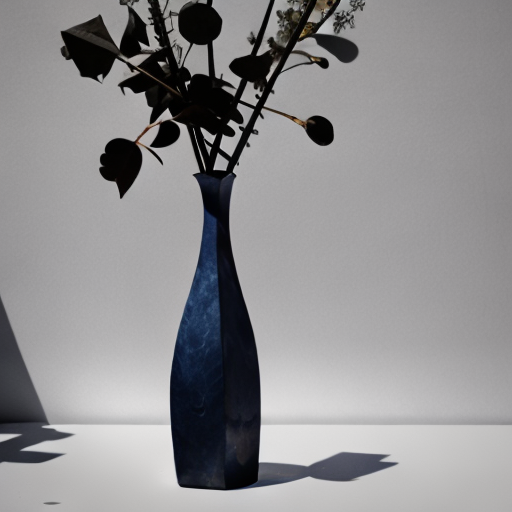

In [7]:
prompt = "a <s1>|<s2> vase on the moon"
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.0)[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

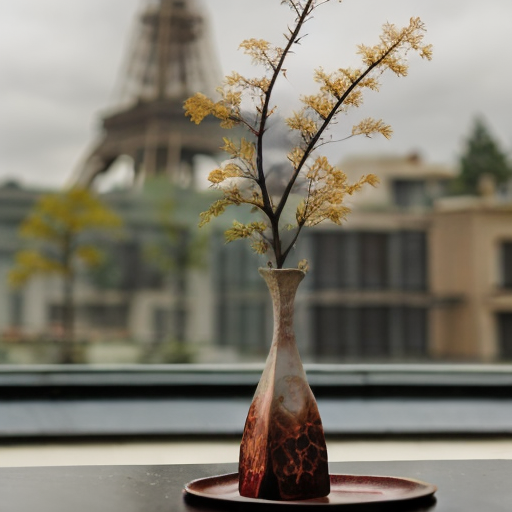

In [12]:
prompt = "a <s1>|<s2> vase with the Eiffel Tower in the background"
image = joint_visualization(pipe, img_model, prompt, ref_image, guidance=7.0, eta=0.1)[0]
image